In [ ]:
#IMPORTAÇÃO DE BIBLIOTECAS NECESSÁRIAS:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#CARREGAMENTO DOS DADOS EM UM DATAFRAME:
df = pd.read_csv("/content/data.csv")
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
#CONVERSÃO DO DATAFRAME EM UM DICIONÁRIO:
# sentencas_emocoes = df.set_index('Sentence')['Sentiment'].to_dict()
# sentencas_emocoes

In [ ]:
#A) ANÁLISE EXPLORATÓRIA DOS DADOS:
#A1 - Visualização de uma amostra do DataFrame:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
#A2 - Extração dos tipos de dados do DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


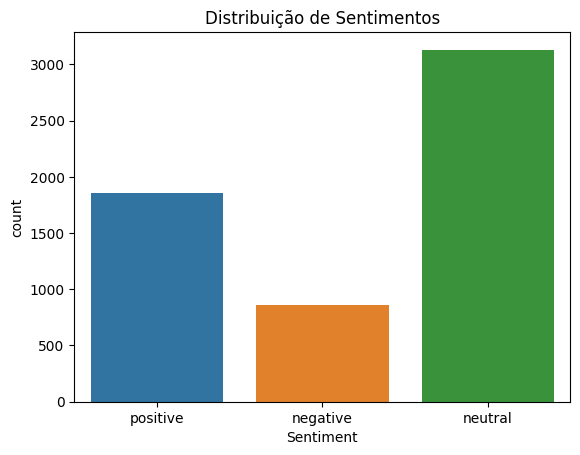

In [ ]:
#A3 - Visualização gráfica dos dados do DataFrame:
#Gráfico de barras para a contagem de sentimentos:
sns.countplot(x='Sentiment', data=df)
plt.title("Distribuição de Sentimentos")
plt.show()

In [ ]:
#A4 - Análise de Texto
#Criação e Visualização de uma coluna com os comprimentos das sentenças:
df['Comprimento_Texto'] = df["Sentence"].apply(len)
print(df[["Sentence", "Comprimento_Texto"]].head(),"\n")
#Distribuição dos comprimentos das sentenças:
print(df["Comprimento_Texto"].describe())

                                            Sentence  Comprimento_Texto
0  The GeoSolutions technology will leverage Bene...                218
1  $ESI on lows, down $1.50 to $2.50 BK a real po...                 55
2  For the last quarter of 2010 , Componenta 's n...                193
3  According to the Finnish-Russian Chamber of Co...                128
4  The Swedish buyout firm has sold its remaining...                135 

count    5842.000000
mean      117.022253
std        56.420425
min         9.000000
25%        72.000000
50%       107.000000
75%       150.000000
max       315.000000
Name: Comprimento_Texto, dtype: float64


<ipython-input-38-7d0de851fbac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


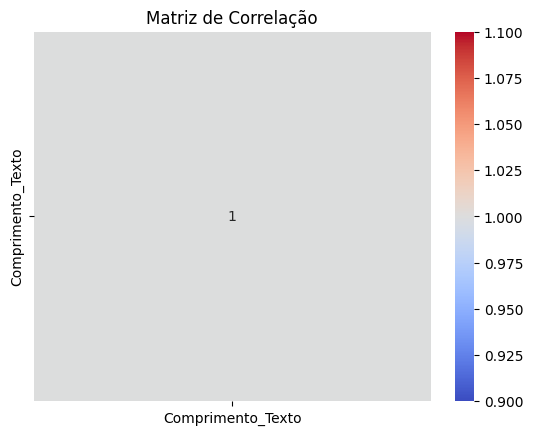

In [ ]:
#A5 - Análise de Correlação
correlacao = df.corr()
sns.heatmap(correlacao, annot=True, cmap = "coolwarm")
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
#A6 - Verificação de Valores Ausentes:
valores_ausentes = df.isnull()
contagem_ausentes = valores_ausentes.sum()
contagem_ausentes

Sentence             0
Sentiment            0
Comprimento_Texto    0
dtype: int64

In [ ]:
#B) TRATAMENTO DOS DADOS:
#B1 - Verificando dados duplicados:
df.drop_duplicates(inplace=True)

In [ ]:
#B2 - Conversão de Tipos de Dados:
df['Sentiment'] = df['Sentiment'].astype('category')

In [ ]:
#B3 - PRÉ-PROCESSAMENTO DE TEXTO:
def preprocess(text):
  #Remoção de Pontuação:
  text = text.translate(str.maketrans('', '', string.punctuation))
  #Converter para minúsculas:
  text = text.lower()
  #Tokenização:
  tokens = word_tokenize(text)
  #Remoção de Stop Words:
  stop_words = set(stopwords.words('english'))
  tokens = [token for token in tokens if token not in stop_words]

  return ''.join(tokens)

df["Processed_Sentence"] = df["Sentence"].apply(preprocess)

,Sentence,Sentiment,Comprimento_Texto,Processed_Sentence
0,The GeoSolutions technology will leverage Bene...,positive,218,geosolutionstechnologyleveragebenefongpssoluti...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55,esilows150250bkrealpossibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,193,lastquarter2010componentanetsalesdoubledeur131...
3,According to the Finnish-Russian Chamber of Co...,neutral,128,accordingfinnishrussianchambercommercemajorcon...
4,The Swedish buyout firm has sold its remaining...,neutral,135,swedishbuyoutfirmsoldremaining224percentstakea...
...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,107,risingcostsforcedpackagingproducerhuhtamakiaxe...
5838,Nordic Walking was first used as a summer trai...,neutral,83,nordicwalkingfirstusedsummertrainingmethodcros...
5839,"According shipping company Viking Line , the E...",neutral,99,accordingshippingcompanyvikinglineeudecisionsi...
5840,"In the building and home improvement trade , s...",neutral,88,buildinghomeimprovementtradesalesdecreased225e...
